In [66]:
from keras.datasets import boston_housing
from keras.datasets import reuters
import numpy as np
import os
from keras.models import Sequential
import tensorflow as tf
from keras import models,Model
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
import time
import pandas as pd
import random
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate
from utils import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import *
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier 
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model, Sequential
import keras
from keras.layers import Conv2D, MaxPooling2D, Input
import tensorboard
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard

In [67]:
#開檔
df = pd.read_excel(r'C:\Users\Big data\Desktop\class\funcardproject\斷詞與和卡額度_20群.xls',encoding='utf-16')
df = df.loc[:, ["age","serveTime","credLimit","Loan","SalPerY","holdCard","Career","credLimit_group"]] 
#若某raw有NAN則整RAW刪除
df =df.dropna(
    axis=0,     # 0: 对行进行操作; 1: 对列进行操作
    how='any'   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    ) 
#把分群的Y轉成int
df['credLimit_group'] = df['credLimit_group'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 0 to 1686
Data columns (total 8 columns):
age                1680 non-null float64
serveTime          1680 non-null float64
credLimit          1680 non-null int64
Loan               1680 non-null float64
SalPerY            1680 non-null int64
holdCard           1680 non-null int64
Career             1680 non-null int64
credLimit_group    1680 non-null int32
dtypes: float64(3), int32(1), int64(4)
memory usage: 111.6 KB


In [68]:
train_data, test_data, train_targets, test_targets = train_test_split(df.loc[:, ["age","serveTime","Loan","SalPerY","holdCard","Career"]] , df.loc[:, ["credLimit_group"]] , test_size=0.3, random_state=4)
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)
#轉array
train_data = np.array(train_data).astype(float)
test_data = np.array(test_data).astype(float)
train_targets = np.array(train_targets).astype(int)
test_targets = np.array(test_targets).astype(int)
#把Y弄成onehot
def to_one_hot(labels, dimension=20):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1.
    return results
train_targets = to_one_hot(train_targets)
test_targets = to_one_hot(test_targets)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

#正規化
#因為relu,所以這個比較好
train_data_max = train_data.max(axis=0)
train_data_min = train_data.min(axis=0)
train_data_range = train_data_max-train_data_min
train_data-=train_data_min
train_data/=train_data_range

test_data_max = test_data.max(axis=0)
test_data_min = test_data.min(axis=0)
test_data_range = test_data_max-test_data_min
test_data-=test_data_min
test_data/=test_data_range

(1176, 6)
(504, 6)
(1176, 1)
(504, 1)
(1176, 6)
(504, 6)
(1176, 20)
(504, 20)


In [69]:
inputs = Input(shape=(6,))
x = Dense(10, activation='relu')(inputs)
x = Dropout(0.1)(x)
x = Dense(10, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(10, activation='sigmoid')(x)
x = Dropout(0.1)(x)

output = Dense(20, activation='softmax')(x)
model = Model(inputs=inputs, outputs=output)

sgd = optimizers.SGD(lr=0.01, momentum=0.00, decay=0.001, nesterov=False)
RMSprop = keras.optimizers.RMSprop(lr=0.001, rho=0.09, epsilon=0.001, decay=0.001)
Adagrad = keras.optimizers.Adagrad(lr=0.01, epsilon=0.01, decay=0.0)
Adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=0.01, decay=0.0)
Adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.01, decay=0.0, amsgrad=False)
Adamax = keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.01, decay=0.0)
# Nadam = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.01, schedule_decay=0.004)
Nadam = keras.optimizers.Nadam(lr=0.002, beta_1=0.99, beta_2=0.9999, epsilon=0.01, schedule_decay=0.0005)

# tbCallBack = TensorBoard(log_dir=r'C:\Users\Big data\Desktop\class\DL\tensorboard\funcardproject',  # log 目录
#                  histogram_freq=0,  # 按照何等频率（epoch）来计算直方图，0为不计算
# #                  batch_size=32,     # 用多大量的数据计算直方图
#                  write_graph=True,  # 是否存储网络结构图
#                  write_grads=True, # 是否可视化梯度直方图
#                  write_images=True,# 是否可视化参数
#                  embeddings_freq=0, 
#                  embeddings_layer_names=None, 
#                  embeddings_metadata=None)
model.summary()
model.compile(optimizer=Nadam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_data,train_targets,
                   epochs=1000,
                   batch_size=32,
                   validation_data=(test_data,test_targets)
#                   ,callbacks=[tbCallBack]
                   )

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        (None, 6)                 0         
_________________________________________________________________
dense_338 (Dense)            (None, 10)                70        
_________________________________________________________________
dropout_32 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_339 (Dense)            (None, 10)                110       
_________________________________________________________________
dropout_33 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_340 (Dense)            (None, 10)                110       
_________________________________________________________________
dropout_34 (Dropout)         (None, 10)                0  

1176/1176 [==============================] - 0s 40us/step - loss: 1.9676 - accuracy: 0.2721 - val_loss: 1.8923 - val_accuracy: 0.2817
Epoch 47/1000
1176/1176 [==============================] - 0s 40us/step - loss: 1.9780 - accuracy: 0.2679 - val_loss: 1.8880 - val_accuracy: 0.2817
Epoch 48/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.9688 - accuracy: 0.2704 - val_loss: 1.8841 - val_accuracy: 0.2897
Epoch 49/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.9628 - accuracy: 0.2798 - val_loss: 1.8810 - val_accuracy: 0.2877
Epoch 50/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.9677 - accuracy: 0.2619 - val_loss: 1.8765 - val_accuracy: 0.2917
Epoch 51/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.9515 - accuracy: 0.2636 - val_loss: 1.8703 - val_accuracy: 0.2897
Epoch 52/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.9524 - accuracy: 0.2772 - val_loss: 1.8640 -

1176/1176 [==============================] - 0s 38us/step - loss: 1.8141 - accuracy: 0.3299 - val_loss: 1.7704 - val_accuracy: 0.3294
Epoch 102/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.8186 - accuracy: 0.3350 - val_loss: 1.7701 - val_accuracy: 0.3294
Epoch 103/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.7871 - accuracy: 0.3376 - val_loss: 1.7678 - val_accuracy: 0.3294
Epoch 104/1000
1176/1176 [==============================] - 0s 43us/step - loss: 1.8067 - accuracy: 0.3257 - val_loss: 1.7708 - val_accuracy: 0.3274
Epoch 105/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.8050 - accuracy: 0.3214 - val_loss: 1.7663 - val_accuracy: 0.3294
Epoch 106/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.8153 - accuracy: 0.3299 - val_loss: 1.7640 - val_accuracy: 0.3333
Epoch 107/1000
1176/1176 [==============================] - 0s 40us/step - loss: 1.8038 - accuracy: 0.3223 - val_loss: 1.

1176/1176 [==============================] - 0s 37us/step - loss: 1.7743 - accuracy: 0.3367 - val_loss: 1.7507 - val_accuracy: 0.3373
Epoch 157/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.7735 - accuracy: 0.3240 - val_loss: 1.7497 - val_accuracy: 0.3333
Epoch 158/1000
1176/1176 [==============================] - 0s 39us/step - loss: 1.7739 - accuracy: 0.3469 - val_loss: 1.7483 - val_accuracy: 0.3393
Epoch 159/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.7485 - accuracy: 0.3529 - val_loss: 1.7448 - val_accuracy: 0.3373
Epoch 160/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.7676 - accuracy: 0.3376 - val_loss: 1.7483 - val_accuracy: 0.3393
Epoch 161/1000
1176/1176 [==============================] - 0s 39us/step - loss: 1.7658 - accuracy: 0.3435 - val_loss: 1.7511 - val_accuracy: 0.3333
Epoch 162/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.7585 - accuracy: 0.3554 - val_loss: 1.

1176/1176 [==============================] - 0s 40us/step - loss: 1.7268 - accuracy: 0.3563 - val_loss: 1.7296 - val_accuracy: 0.3492
Epoch 212/1000
1176/1176 [==============================] - 0s 40us/step - loss: 1.7431 - accuracy: 0.3316 - val_loss: 1.7309 - val_accuracy: 0.3413
Epoch 213/1000
1176/1176 [==============================] - 0s 40us/step - loss: 1.7466 - accuracy: 0.3469 - val_loss: 1.7353 - val_accuracy: 0.3452
Epoch 214/1000
1176/1176 [==============================] - 0s 40us/step - loss: 1.7488 - accuracy: 0.3469 - val_loss: 1.7384 - val_accuracy: 0.3353
Epoch 215/1000
1176/1176 [==============================] - 0s 41us/step - loss: 1.7354 - accuracy: 0.3478 - val_loss: 1.7389 - val_accuracy: 0.3353
Epoch 216/1000
1176/1176 [==============================] - 0s 41us/step - loss: 1.7285 - accuracy: 0.3597 - val_loss: 1.7412 - val_accuracy: 0.3353
Epoch 217/1000
1176/1176 [==============================] - 0s 39us/step - loss: 1.7257 - accuracy: 0.3512 - val_loss: 1.

1176/1176 [==============================] - 0s 37us/step - loss: 1.7211 - accuracy: 0.3520 - val_loss: 1.7220 - val_accuracy: 0.3452
Epoch 267/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.7218 - accuracy: 0.3699 - val_loss: 1.7209 - val_accuracy: 0.3452
Epoch 268/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.7041 - accuracy: 0.3648 - val_loss: 1.7201 - val_accuracy: 0.3472
Epoch 269/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.7220 - accuracy: 0.3656 - val_loss: 1.7245 - val_accuracy: 0.3492
Epoch 270/1000
1176/1176 [==============================] - 0s 36us/step - loss: 1.7037 - accuracy: 0.3546 - val_loss: 1.7201 - val_accuracy: 0.3452
Epoch 271/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.7168 - accuracy: 0.3418 - val_loss: 1.7202 - val_accuracy: 0.3452
Epoch 272/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.7244 - accuracy: 0.3563 - val_loss: 1.

1176/1176 [==============================] - 0s 37us/step - loss: 1.7006 - accuracy: 0.3597 - val_loss: 1.6982 - val_accuracy: 0.3492
Epoch 322/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6688 - accuracy: 0.3665 - val_loss: 1.6930 - val_accuracy: 0.3512
Epoch 323/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6627 - accuracy: 0.3614 - val_loss: 1.6896 - val_accuracy: 0.3631
Epoch 324/1000
1176/1176 [==============================] - 0s 36us/step - loss: 1.6803 - accuracy: 0.3503 - val_loss: 1.6887 - val_accuracy: 0.3611
Epoch 325/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6746 - accuracy: 0.3444 - val_loss: 1.6910 - val_accuracy: 0.3552
Epoch 326/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6803 - accuracy: 0.3588 - val_loss: 1.6903 - val_accuracy: 0.3571
Epoch 327/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6701 - accuracy: 0.3605 - val_loss: 1.

1176/1176 [==============================] - 0s 37us/step - loss: 1.6448 - accuracy: 0.3673 - val_loss: 1.6646 - val_accuracy: 0.3690
Epoch 377/1000
1176/1176 [==============================] - 0s 39us/step - loss: 1.6660 - accuracy: 0.3707 - val_loss: 1.6709 - val_accuracy: 0.3651
Epoch 378/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6518 - accuracy: 0.3665 - val_loss: 1.6706 - val_accuracy: 0.3651
Epoch 379/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6634 - accuracy: 0.3682 - val_loss: 1.6739 - val_accuracy: 0.3651
Epoch 380/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6576 - accuracy: 0.3597 - val_loss: 1.6713 - val_accuracy: 0.3671
Epoch 381/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6502 - accuracy: 0.3733 - val_loss: 1.6703 - val_accuracy: 0.3651
Epoch 382/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6575 - accuracy: 0.3597 - val_loss: 1.

1176/1176 [==============================] - 0s 39us/step - loss: 1.6473 - accuracy: 0.3673 - val_loss: 1.6636 - val_accuracy: 0.3552
Epoch 432/1000
1176/1176 [==============================] - 0s 39us/step - loss: 1.6531 - accuracy: 0.3648 - val_loss: 1.6618 - val_accuracy: 0.3591
Epoch 433/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6579 - accuracy: 0.3759 - val_loss: 1.6613 - val_accuracy: 0.3611
Epoch 434/1000
1176/1176 [==============================] - 0s 45us/step - loss: 1.6467 - accuracy: 0.3784 - val_loss: 1.6615 - val_accuracy: 0.3591
Epoch 435/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6590 - accuracy: 0.3546 - val_loss: 1.6639 - val_accuracy: 0.3571
Epoch 436/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6440 - accuracy: 0.3707 - val_loss: 1.6619 - val_accuracy: 0.3591
Epoch 437/1000
1176/1176 [==============================] - 0s 42us/step - loss: 1.6523 - accuracy: 0.3741 - val_loss: 1.

1176/1176 [==============================] - 0s 40us/step - loss: 1.6450 - accuracy: 0.3682 - val_loss: 1.6644 - val_accuracy: 0.3611
Epoch 487/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6455 - accuracy: 0.3750 - val_loss: 1.6677 - val_accuracy: 0.3631
Epoch 488/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6333 - accuracy: 0.3665 - val_loss: 1.6691 - val_accuracy: 0.3591
Epoch 489/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6371 - accuracy: 0.3801 - val_loss: 1.6652 - val_accuracy: 0.3651
Epoch 490/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6398 - accuracy: 0.3784 - val_loss: 1.6657 - val_accuracy: 0.3710
Epoch 491/1000
1176/1176 [==============================] - 0s 39us/step - loss: 1.6404 - accuracy: 0.3699 - val_loss: 1.6684 - val_accuracy: 0.3611
Epoch 492/1000
1176/1176 [==============================] - 0s 39us/step - loss: 1.6465 - accuracy: 0.3546 - val_loss: 1.

1176/1176 [==============================] - 0s 37us/step - loss: 1.6541 - accuracy: 0.3707 - val_loss: 1.6713 - val_accuracy: 0.3631
Epoch 542/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6363 - accuracy: 0.3554 - val_loss: 1.6704 - val_accuracy: 0.3591
Epoch 543/1000
1176/1176 [==============================] - 0s 43us/step - loss: 1.6401 - accuracy: 0.3707 - val_loss: 1.6672 - val_accuracy: 0.3532
Epoch 544/1000
1176/1176 [==============================] - 0s 39us/step - loss: 1.6395 - accuracy: 0.3622 - val_loss: 1.6729 - val_accuracy: 0.3571
Epoch 545/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6331 - accuracy: 0.3759 - val_loss: 1.6664 - val_accuracy: 0.3651
Epoch 546/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6394 - accuracy: 0.3639 - val_loss: 1.6697 - val_accuracy: 0.3571
Epoch 547/1000
1176/1176 [==============================] - 0s 39us/step - loss: 1.6328 - accuracy: 0.3776 - val_loss: 1.

1176/1176 [==============================] - 0s 37us/step - loss: 1.6210 - accuracy: 0.3801 - val_loss: 1.6774 - val_accuracy: 0.3591
Epoch 597/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6184 - accuracy: 0.3895 - val_loss: 1.6683 - val_accuracy: 0.3671
Epoch 598/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6537 - accuracy: 0.3759 - val_loss: 1.6682 - val_accuracy: 0.3532
Epoch 599/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6487 - accuracy: 0.3776 - val_loss: 1.6730 - val_accuracy: 0.3532
Epoch 600/1000
1176/1176 [==============================] - 0s 39us/step - loss: 1.6404 - accuracy: 0.3793 - val_loss: 1.6758 - val_accuracy: 0.3671
Epoch 601/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6271 - accuracy: 0.3699 - val_loss: 1.6680 - val_accuracy: 0.3591
Epoch 602/1000
1176/1176 [==============================] - 0s 39us/step - loss: 1.6320 - accuracy: 0.3733 - val_loss: 1.

1176/1176 [==============================] - 0s 41us/step - loss: 1.6263 - accuracy: 0.3665 - val_loss: 1.6727 - val_accuracy: 0.3591
Epoch 652/1000
1176/1176 [==============================] - 0s 39us/step - loss: 1.6205 - accuracy: 0.3827 - val_loss: 1.6706 - val_accuracy: 0.3611
Epoch 653/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6305 - accuracy: 0.3741 - val_loss: 1.6714 - val_accuracy: 0.3651
Epoch 654/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6446 - accuracy: 0.3665 - val_loss: 1.6771 - val_accuracy: 0.3690
Epoch 655/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6483 - accuracy: 0.3793 - val_loss: 1.6723 - val_accuracy: 0.3730
Epoch 656/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6326 - accuracy: 0.3690 - val_loss: 1.6767 - val_accuracy: 0.3730
Epoch 657/1000
1176/1176 [==============================] - 0s 39us/step - loss: 1.6253 - accuracy: 0.3818 - val_loss: 1.

1176/1176 [==============================] - 0s 39us/step - loss: 1.6319 - accuracy: 0.3690 - val_loss: 1.6827 - val_accuracy: 0.3690
Epoch 707/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6362 - accuracy: 0.3903 - val_loss: 1.6844 - val_accuracy: 0.3690
Epoch 708/1000
1176/1176 [==============================] - 0s 46us/step - loss: 1.6173 - accuracy: 0.3690 - val_loss: 1.6783 - val_accuracy: 0.3690
Epoch 709/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6272 - accuracy: 0.3869 - val_loss: 1.6814 - val_accuracy: 0.3671
Epoch 710/1000
1176/1176 [==============================] - 0s 42us/step - loss: 1.6426 - accuracy: 0.3648 - val_loss: 1.6815 - val_accuracy: 0.3671
Epoch 711/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6213 - accuracy: 0.3759 - val_loss: 1.6801 - val_accuracy: 0.3690
Epoch 712/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6302 - accuracy: 0.3614 - val_loss: 1.

1176/1176 [==============================] - 0s 37us/step - loss: 1.6191 - accuracy: 0.3741 - val_loss: 1.6806 - val_accuracy: 0.3770
Epoch 762/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6305 - accuracy: 0.3852 - val_loss: 1.6860 - val_accuracy: 0.3710
Epoch 763/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6274 - accuracy: 0.3767 - val_loss: 1.6863 - val_accuracy: 0.3710
Epoch 764/1000
1176/1176 [==============================] - 0s 39us/step - loss: 1.6070 - accuracy: 0.3852 - val_loss: 1.6782 - val_accuracy: 0.3730
Epoch 765/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6295 - accuracy: 0.3801 - val_loss: 1.6732 - val_accuracy: 0.3750
Epoch 766/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6208 - accuracy: 0.3895 - val_loss: 1.6800 - val_accuracy: 0.3810
Epoch 767/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6323 - accuracy: 0.3563 - val_loss: 1.

1176/1176 [==============================] - 0s 38us/step - loss: 1.6188 - accuracy: 0.3759 - val_loss: 1.6827 - val_accuracy: 0.3710
Epoch 817/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6309 - accuracy: 0.3750 - val_loss: 1.6863 - val_accuracy: 0.3651
Epoch 818/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6188 - accuracy: 0.3810 - val_loss: 1.6751 - val_accuracy: 0.3730
Epoch 819/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6275 - accuracy: 0.3835 - val_loss: 1.6828 - val_accuracy: 0.3750
Epoch 820/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6207 - accuracy: 0.3818 - val_loss: 1.6852 - val_accuracy: 0.3710
Epoch 821/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6237 - accuracy: 0.3580 - val_loss: 1.6846 - val_accuracy: 0.3671
Epoch 822/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6165 - accuracy: 0.3827 - val_loss: 1.

1176/1176 [==============================] - 0s 39us/step - loss: 1.6270 - accuracy: 0.3776 - val_loss: 1.6804 - val_accuracy: 0.3611
Epoch 872/1000
1176/1176 [==============================] - 0s 39us/step - loss: 1.6234 - accuracy: 0.3767 - val_loss: 1.6764 - val_accuracy: 0.3690
Epoch 873/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6244 - accuracy: 0.3827 - val_loss: 1.6819 - val_accuracy: 0.3690
Epoch 874/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6078 - accuracy: 0.3835 - val_loss: 1.6846 - val_accuracy: 0.3611
Epoch 875/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6280 - accuracy: 0.3784 - val_loss: 1.6898 - val_accuracy: 0.3631
Epoch 876/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6164 - accuracy: 0.3767 - val_loss: 1.6898 - val_accuracy: 0.3671
Epoch 877/1000
1176/1176 [==============================] - 0s 39us/step - loss: 1.6141 - accuracy: 0.3784 - val_loss: 1.

1176/1176 [==============================] - 0s 41us/step - loss: 1.5995 - accuracy: 0.3750 - val_loss: 1.6873 - val_accuracy: 0.3631
Epoch 927/1000
1176/1176 [==============================] - 0s 39us/step - loss: 1.6090 - accuracy: 0.3690 - val_loss: 1.6822 - val_accuracy: 0.3651
Epoch 928/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6037 - accuracy: 0.3912 - val_loss: 1.6869 - val_accuracy: 0.3671
Epoch 929/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.5995 - accuracy: 0.3793 - val_loss: 1.6868 - val_accuracy: 0.3671
Epoch 930/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6054 - accuracy: 0.3801 - val_loss: 1.6905 - val_accuracy: 0.3690
Epoch 931/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6198 - accuracy: 0.3793 - val_loss: 1.6845 - val_accuracy: 0.3730
Epoch 932/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6055 - accuracy: 0.3741 - val_loss: 1.

1176/1176 [==============================] - 0s 39us/step - loss: 1.6172 - accuracy: 0.3852 - val_loss: 1.7042 - val_accuracy: 0.3730
Epoch 982/1000
1176/1176 [==============================] - 0s 39us/step - loss: 1.6118 - accuracy: 0.3699 - val_loss: 1.7005 - val_accuracy: 0.3710
Epoch 983/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6073 - accuracy: 0.3699 - val_loss: 1.6963 - val_accuracy: 0.3750
Epoch 984/1000
1176/1176 [==============================] - 0s 37us/step - loss: 1.6164 - accuracy: 0.3784 - val_loss: 1.6888 - val_accuracy: 0.3849
Epoch 985/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6282 - accuracy: 0.3741 - val_loss: 1.6999 - val_accuracy: 0.3710
Epoch 986/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6038 - accuracy: 0.3835 - val_loss: 1.6971 - val_accuracy: 0.3790
Epoch 987/1000
1176/1176 [==============================] - 0s 38us/step - loss: 1.6199 - accuracy: 0.3801 - val_loss: 1.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35347 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32244 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33287 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39511 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35657 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30340 missing from c

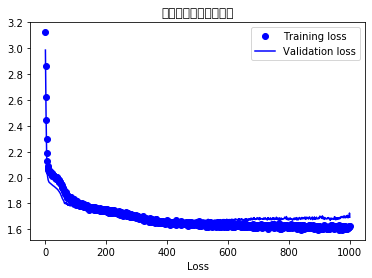

In [70]:
#繪圖

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+ 1)
plt.plot(epochs, loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b',label='Validation loss')
plt.title('訓練與驗證的損失函數')
plt.xlabel('Epohs')
plt.xlabel('Loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

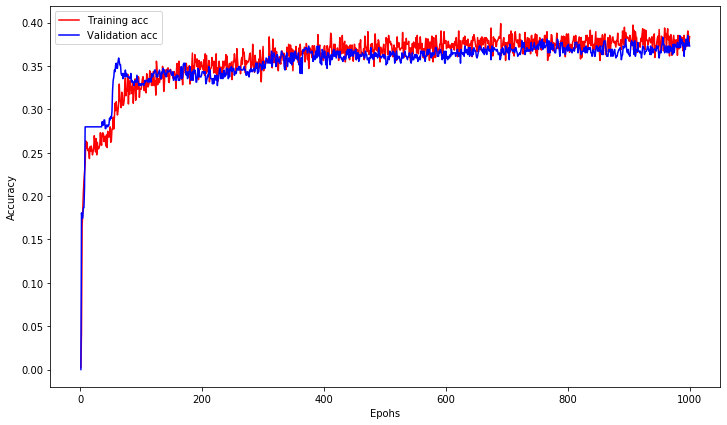

In [71]:
plt.clf()
plt.figure(figsize=(12, 7))  
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs, acc, 'r',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('')
plt.xlabel('Epohs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 測試小綠同學

In [72]:
小綠 = pd.DataFrame(columns=["age","serveTime","Loan","SalPerY","holdCard","Career"])
小綠.loc[0]=8,120,4,600000,1,1
小綠.loc[1]=28,12,0,6000000,0,0
小綠.loc[2]=28,12,0,87,2,0
小綠

,age,serveTime,Loan,SalPerY,holdCard,Career
0,8,120,4,600000,1,1
1,28,12,0,6000000,0,0
2,28,12,0,87,2,0


In [74]:
# 因為先前輸入時有先標準化,因此輸入也要標準化
小綠-=train_data_min
小綠/=train_data_range
#轉array
小綠 = 小綠.astype(float)
# 小綠 = np.array(小綠).astype(float)

In [87]:
# 他給出的是每一群的機率(相加為一)
preds = model.predict(小綠)
preds[1]

array([9.81298182e-03, 4.00218256e-02, 5.86975664e-02, 8.23580325e-02,
       1.24504596e-01, 6.93644881e-02, 1.49908409e-01, 6.63447380e-02,
       9.24009755e-02, 6.84787557e-02, 1.08294696e-01, 7.16294744e-05,
       8.88442397e-02, 7.81617593e-03, 2.54195952e-03, 1.06555126e-04,
       4.07484313e-03, 7.00481614e-05, 2.02694144e-02, 6.01802999e-03],
      dtype=float32)

In [92]:
#接著我們找出裡面機率最大的值的所在位子
qq = np.where(preds[1]==np.max(preds[1]))

In [94]:
#回傳值
qq[0][0]

6